### Cu$_2$Te Grain Size Analysis

The following code plots number of grains versus nanoparticle size for an array of synthesized Cu$_2$Te nanoparticles. All multi-crystalline nanoparticles and their respective grain sizes were previously analyzed (see relevant notebook) with py4DSTEM. Single-crystal nanoparticles were analyzed for size either with py4DSTEM or high resolution TEM images of the nanoparticles due to size limitations.

In [1]:
#Import relevant packages
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Define path
path = "/projects/p30974/ake6682/Cu2Te"

folders = []
for root, directories, files in os.walk(path):
    for directory in directories:
        folders.append(os.path.join(root, directory))

# Initialize lists
grainSizeList = []
folderList = []
particleSizeList = []
numberOfGrainsList = []
averageGrainSizeList = []

#Extract particle size, grain size, number of grains, average grain size information from previously processed data
for folder in folders:
    grainfiles = [f for f in os.listdir(folder) if f.endswith('.csv')]
    for grainfile in grainfiles:
        #if 'NP2_' not in folder and 'NP9_' not in folder and 'NP12_' not in folder:
        filepath = os.path.join(folder, grainfile)
        # Load only once with correct encoding
        data = np.loadtxt(filepath, delimiter=',', encoding='utf-8-sig')
        grainSizeList.append(data)
        folderList.append(filepath)
        particleSizeList.append(int(folder.split('_')[1].split('nm')[0]))
        numberOfGrainsList.append(data.size)
        averageGrainSizeList.append(np.mean(data))


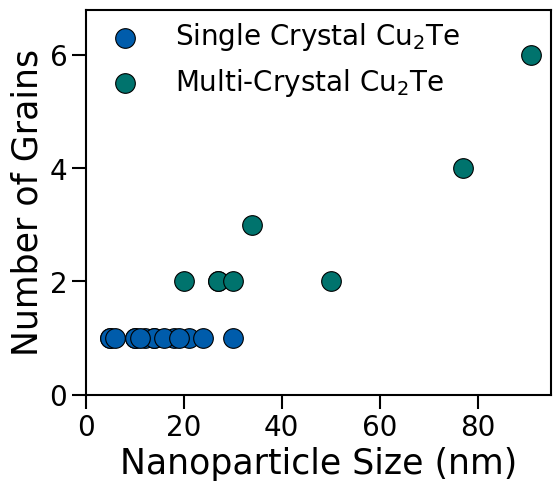

In [3]:
# Convert to numpy arrays
x = np.array(particleSizeList)
y = np.array(numberOfGrainsList)

# Mask for single crystal versus multi-crystal
SC_mask = y == 1
MC_mask = y != 1

# Create scatter plot for single crystal and multi-crystal
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(x[SC_mask], y[SC_mask],color='#005CAB',edgecolor='black',linewidth=0.8,s=200,label='Single Crystal Cu$_2$Te')
plt.scatter(x[MC_mask], y[MC_mask],color='#00736D',edgecolor='black',linewidth=0.8,s=200,label='Multi-Crystal Cu$_2$Te')

# Axis labels
plt.xlabel("Nanoparticle Size (nm)", fontsize=25)
plt.ylabel("Number of Grains", fontsize=25)

#Plot settings
plt.tick_params(axis='x', which='minor', bottom=False, top=False, labelbottom=False)
ax.tick_params(axis='x', which='major', length=10, width=1.5,labelsize=20) 
ax.tick_params(axis='y', which='major', length=10, width=1.5, labelsize=20) 
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])
plt.yticks([0,2, 4, 6])
plt.xlim(0,95)
plt.ylim(0, 6.8)

#Legend settings
plt.legend(loc='upper left',borderaxespad=0.0,frameon=False,fontsize=20)#labelspacing=3.0,

plt.savefig(f"/projects/p30974/ake6682/Cu2Te/grainsizeplot-scalebar.png", dpi=1000, bbox_inches='tight')